<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/M1_Image%20Processing/Exercise%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

<ipython-input-4-dfb522858261>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
<ipython-input-4-dfb522858261>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


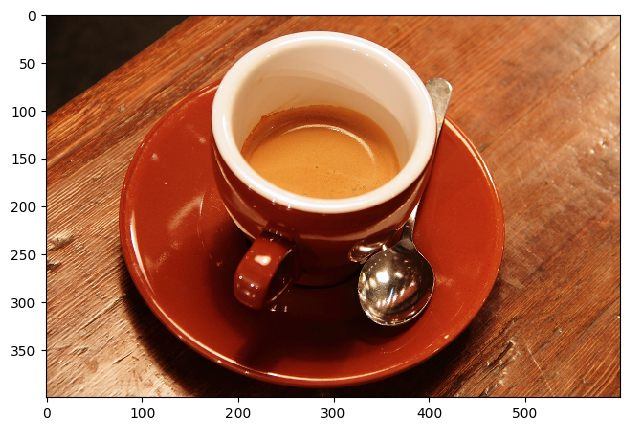

M = 400 columns, N = 600 rows, NC = 3 color channels


In [4]:
import skimage as sk # load skimage libraries
IC = sk.data.coffee() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

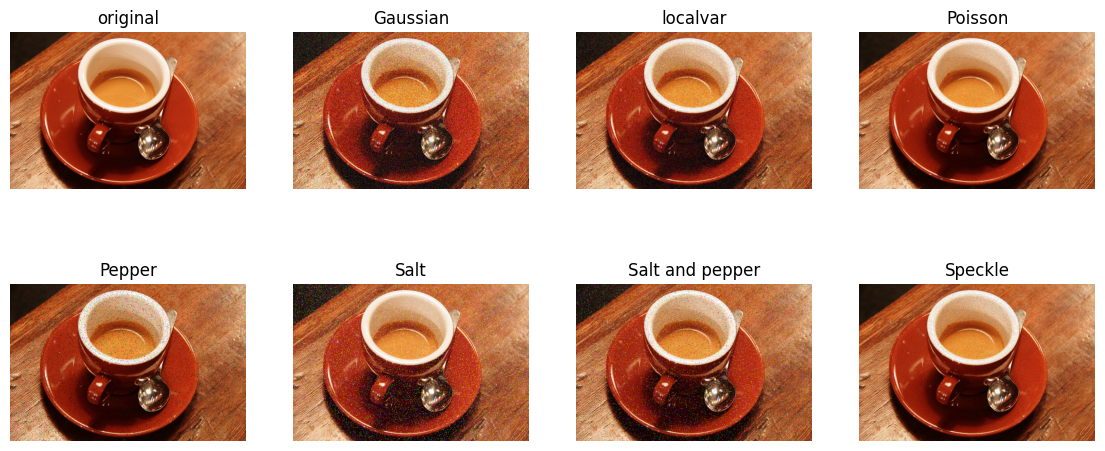

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

#create noisy images
original = IC
sigma = 0.15
noisy_image_normal = random_noise(original, var=sigma**2)
noisy_image_localvar = random_noise(original, mode="localvar")
noisy_image_poisson = random_noise(original, mode="poisson")
noisy_image_salt = random_noise(original, mode="salt")
noisy_image_pepper = random_noise(original, mode="pepper")
noisy_image_sp = random_noise(original, mode="s&p")
noisy_image_speckle = random_noise(original, mode="speckle")


#show the noisy images
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols=4, nrows=2,figsize=(14, 6), sharex=True, sharey=True)
ax1.imshow(original, cmap=plt.cm.gray)
ax1.set_title('original')
ax1.axis('off')
ax2.imshow(noisy_image_normal, cmap=plt.cm.gray)
ax2.set_title('Gaussian')
ax2.axis('off')
ax3.imshow(noisy_image_localvar, cmap=plt.cm.gray)
ax3.set_title('localvar')
ax3.axis('off')
ax4.imshow(noisy_image_poisson, cmap=plt.cm.gray)
ax4.set_title('Poisson')
ax4.axis('off')
ax5.imshow(noisy_image_pepper, cmap=plt.cm.gray)
ax5.set_title('Pepper')
ax5.axis('off')
ax6.imshow(noisy_image_salt, cmap=plt.cm.gray)
ax6.set_title('Salt')
ax6.axis('off')
ax7.imshow(noisy_image_sp, cmap=plt.cm.gray)
ax7.set_title('Salt and pepper')
ax7.axis('off')
ax8.imshow(noisy_image_speckle, cmap=plt.cm.gray)
ax8.set_title('Speckle')
ax8.axis('off')

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4:** The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

<ipython-input-11-71a94190ad5a>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(brick) # visualize image using imshow function
<ipython-input-11-71a94190ad5a>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


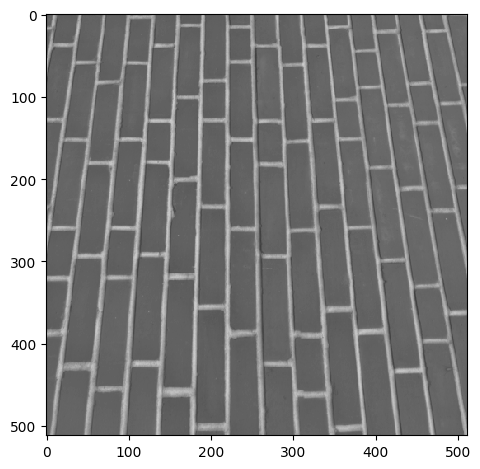

M = 400 columns, N = 600 rows, NC = 3 color channels


In [11]:
import skimage as sk # load skimage libraries
brick = sk.data.brick() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(brick) # visualize image using imshow function
sk.io.show()
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape))







**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk


